# DATA 606 Capstone Project

## **Topic:** Detecting Fake News with Python and Machine Learning


**Author:** Snigdha Panakanti

**Term:** Summer 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/fake_or_real_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


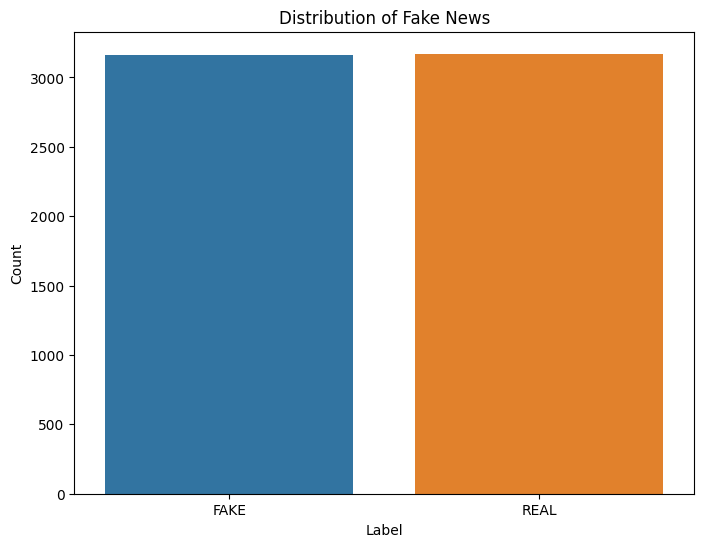

In [5]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title("Distribution of Fake News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

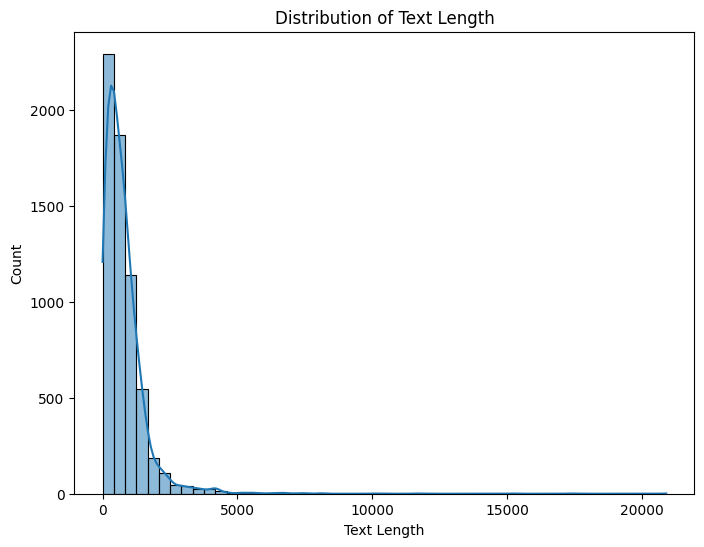

In [6]:
# Text length distribution
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(x='text_length', data=df, bins=50, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()

In [7]:
# Word frequency analysis
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
# Combine all text into a single string
all_text = ' '.join(df['text'])

In [ ]:
# Tokenize the text
tokens = word_tokenize(all_text)

In [ ]:
# Remove stop words
filtered_words = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

In [ ]:
# Count word frequency
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

In [ ]:
# Plotting word frequency
plt.figure(figsize=(10, 6))
words, counts = zip(*top_words)
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()